In [104]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from scipy.stats import mode
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.ensemble import GradientBoostingClassifier

In [47]:
loan_pred = pd.read_csv("data/train_ctrUa4K.csv")

In [48]:
loan_pred.isna().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [49]:
loan_pred = loan_pred.drop('Gender',1)

In [50]:
is_married = loan_pred['Married'].isnull()
loan_pred[is_married]

,Loan_ID,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
104,LP001357,NaN,NaN,Graduate,No,3816,754.0,160.0,360.0,1.0,Urban,Y
228,LP001760,NaN,NaN,Graduate,No,4758,0.0,158.0,480.0,1.0,Semiurban,Y
435,LP002393,NaN,NaN,Graduate,No,10047,0.0,NaN,240.0,1.0,Semiurban,Y


In [51]:
loan_pred = loan_pred[loan_pred['Married'].notnull()]

In [52]:
loan_pred.isna().sum()

Loan_ID               0
Married               0
Dependents           12
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           21
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [53]:
married = loan_pred['Married']== 'Yes'
dependents = loan_pred['Dependents']== '0'

loan_pred.loc[married & dependents,'Dependents'] = '1'


In [54]:
from scipy.stats import mode
dependents_mode = loan_pred.pivot_table(values='Dependents', columns='Married',aggfunc=(lambda x:mode(x).mode[0]) )
print(dependents_mode)

miss_bool = loan_pred['Dependents'].isnull() 

loan_pred.loc[miss_bool,'Dependents'] = loan_pred.loc[miss_bool,'Married'].apply(lambda x: dependents_mode[x])


Married    No Yes
Dependents  0   1


In [55]:
loan_pred['LoanAmount'].fillna((loan_pred['LoanAmount'].mean()), inplace=True)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f8afa562780>]],
      dtype=object)

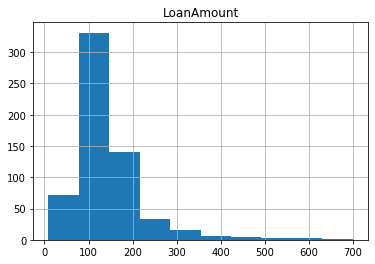

In [56]:
loan_pred.hist(column='LoanAmount')

In [57]:
loan_pred['LoanAmount'] = np.log(loan_pred['LoanAmount'])

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f8afa352f98>]],
      dtype=object)

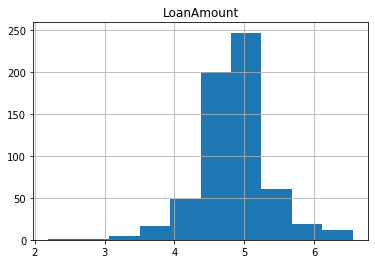

In [58]:
loan_pred.hist(column='LoanAmount')

In [59]:
loan_pred['Loan_Amount_Term'].fillna((loan_pred['Loan_Amount_Term'].mean()), inplace=True)

In [60]:
loan_pred["Self_Employed"].fillna("No", inplace = True) 

In [61]:
loan_pred["Credit_History"].fillna(1, inplace = True) 

In [62]:
loan_pred

,Loan_ID,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,No,0,Graduate,No,5849,0.0,4.986134,360.0,1.0,Urban,Y
1,LP001003,Yes,1,Graduate,No,4583,1508.0,4.852030,360.0,1.0,Rural,N
2,LP001005,Yes,1,Graduate,Yes,3000,0.0,4.189655,360.0,1.0,Urban,Y
3,LP001006,Yes,1,Not Graduate,No,2583,2358.0,4.787492,360.0,1.0,Urban,Y
4,LP001008,No,0,Graduate,No,6000,0.0,4.948760,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,No,0,Graduate,No,2900,0.0,4.262680,360.0,1.0,Rural,Y
610,LP002979,Yes,3+,Graduate,No,4106,0.0,3.688879,180.0,1.0,Rural,Y
611,LP002983,Yes,1,Graduate,No,8072,240.0,5.533389,360.0,1.0,Urban,Y
612,LP002984,Yes,2,Graduate,No,7583,0.0,5.231109,360.0,1.0,Urban,Y


In [63]:
loan_pred['Married'] = loan_pred['Married'].apply(lambda x : 0 if x == "No" else "1")

In [64]:
loan_pred['Self_Employed'] = loan_pred['Self_Employed'].apply(lambda x : 0 if x == "No" else "1")

In [65]:
loan_pred['Dependents'] = loan_pred['Dependents'].apply(lambda x : 0 if x == "0" else 1 if x == "1" else 2 if x =="2" else 3 if x =="3+" else None)

In [66]:
loan_pred['Education'] = loan_pred['Education'].apply(lambda x : 0 if x == "Not Graduate" else 1 if x == "Graduate" else None)

In [67]:
loan_pred['Property_Area'] = loan_pred['Property_Area'].apply(lambda x : 0 if x == "Rural" else 1 if x == "Semiurban" else 2 if x == "Urban" else Nome)

In [68]:
loan_pred

,Loan_ID,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,0,0,1,0,5849,0.0,4.986134,360.0,1.0,2,Y
1,LP001003,1,1,1,0,4583,1508.0,4.852030,360.0,1.0,0,N
2,LP001005,1,1,1,1,3000,0.0,4.189655,360.0,1.0,2,Y
3,LP001006,1,1,0,0,2583,2358.0,4.787492,360.0,1.0,2,Y
4,LP001008,0,0,1,0,6000,0.0,4.948760,360.0,1.0,2,Y
...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,0,0,1,0,2900,0.0,4.262680,360.0,1.0,0,Y
610,LP002979,1,3,1,0,4106,0.0,3.688879,180.0,1.0,0,Y
611,LP002983,1,1,1,0,8072,240.0,5.533389,360.0,1.0,2,Y
612,LP002984,1,2,1,0,7583,0.0,5.231109,360.0,1.0,2,Y


In [69]:
loan_pred = loan_pred.drop('Loan_ID',1)

In [70]:
loan_pred['Total_Income'] = loan_pred['ApplicantIncome'] + loan_pred['CoapplicantIncome']

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f8afa2c9eb8>]],
      dtype=object)

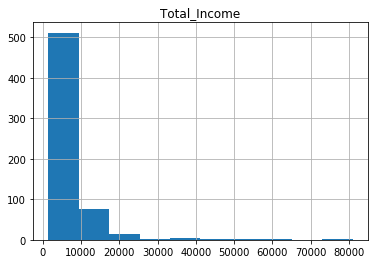

In [71]:
loan_pred.hist(column='Total_Income')

In [72]:
loan_pred['Total_Income'] = np.log(loan_pred['Total_Income'])

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f8afa1e0128>]],
      dtype=object)

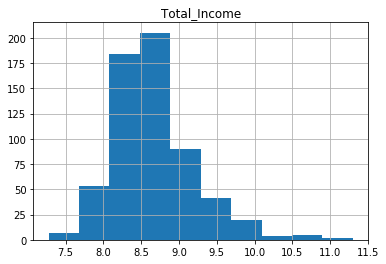

In [73]:
loan_pred.hist(column='Total_Income')

In [74]:
loan_pred['EMI'] = loan_pred['LoanAmount']/loan_pred['Loan_Amount_Term']

In [75]:
loan_y = loan_pred['Loan_Status']

In [76]:
loan_pred = loan_pred.drop('Loan_Status', 1)

In [77]:
loan_pred = loan_pred.drop('ApplicantIncome', 1)

In [78]:
loan_pred = loan_pred.drop('CoapplicantIncome', 1)

In [79]:
loan_pred = loan_pred.drop('LoanAmount', 1)

In [80]:
loan_pred = pd.get_dummies(loan_pred,columns=[ 'Married','Dependents','Self_Employed','Education','Property_Area'])


In [ ]:
from sklearn.decomposition import PCA
# pca - keep 90% of variance
pca = PCA(0.9)
principal_components = pca.fit_transform(xTrain)
principal_df = pd.DataFrame(data = principal_components)
print(principal_df.shape)

In [81]:
from sklearn.model_selection import train_test_split
xTrain, xTest, yTrain, yTest = train_test_split(loan_pred, loan_y, test_size = 0.3, random_state = 0)

In [82]:
logreg = LogisticRegression(penalty='l2',solver='liblinear',max_iter=300)
logreg.fit(xTrain,yTrain)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=300,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

In [83]:
sc=logreg.score(xTest,yTest)

In [84]:
sc

0.8206521739130435

In [ ]:

regressor = RandomForestClassifier(n_estimators = 1000, random_state = 0)

In [ ]:
regressor.fit(xTrain, yTrain) 

In [ ]:
accuracy = regressor.score(xTest,yTest)

In [ ]:
accuracy

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
import numpy as np
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
max_features = ['auto', 'sqrt']
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
min_samples_split = [2, 5, 10]
min_samples_leaf = [1, 2, 4]
bootstrap = [True, False]
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
print(random_grid)

In [ ]:
rf = RandomForestClassifier()
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)
rf_random.fit(xTrain,yTrain)

In [ ]:
print(rf_random.best_params_)

In [95]:
regressor = RandomForestClassifier(n_estimators = 200, min_samples_split = 5,min_samples_leaf=4,max_features='auto',max_depth=10,bootstrap = True)
regressor.fit(xTrain, yTrain) 

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=10, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=4, min_samples_split=5,
                       min_weight_fraction_leaf=0.0, n_estimators=200,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [96]:
accuracy = regressor.score(xTest,yTest)

In [97]:
accuracy

0.8152173913043478

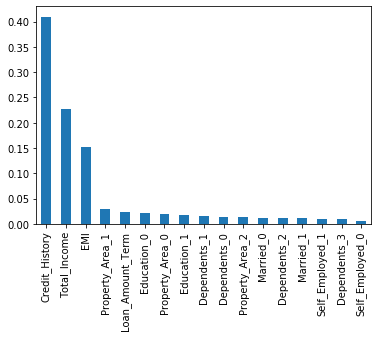

In [45]:
x = list(xTrain)
y = regressor.feature_importances_

coef_rf = pd.Series(y,x).sort_values(ascending=False)
coef_rf.plot(kind='bar')

In [ ]:

#running again from line before splitting x and y
loan_pred

In [ ]:
loan_pred = loan_pred.drop('Loan_ID',1)

In [ ]:
loan_pred['Loan_Status'] = loan_pred['Loan_Status'].apply(lambda x: 1 if x=='Y' else 0)

In [ ]:
loan_pred['Credit_History'] = pd.to_numeric(loan_pred['Credit_History'])

In [ ]:
loan_y = loan_pred['Loan_Status']

In [ ]:
loan_pred = loan_pred.drop('Loan_Status', 1)

In [ ]:
loan_pred = pd.get_dummies(loan_pred,columns=[ 'Married','Dependents','Self_Employed','Education','Property_Area'])

In [ ]:
from sklearn.model_selection import train_test_split
xTrain, xTest, yTrain, yTest = train_test_split(loan_pred, loan_y, test_size = 0.3, random_state = 0)

In [ ]:
import numpy as np
import xgboost as xgb
from sklearn.metrics import mean_squared_error

model_xg = xgb.XGBClassifier(objective ='reg:logistic',min_child_weight=1,gamma=0.1, learning_rate = 0.05,max_depth = 3, n_estimators = 1000)
#model_xg.train(data_dmatrix)
model_xg.fit(xTrain,yTrain)
sc = model_xg.score(xTest,yTest)

In [ ]:
sc

In [ ]:
clf = xgb.XGBClassifier()

param_grid = {
        'silent': [False],
        'max_depth': [6, 10, 15, 20],
        'learning_rate': [0.001, 0.01, 0.1, 0.2, 0,3],
        'subsample': [0.5, 0.6, 0.7, 0.8, 0.9, 1.0],
        'colsample_bytree': [0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0],
        'colsample_bylevel': [0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0],
        'min_child_weight': [0.5, 1.0, 3.0, 5.0, 7.0, 10.0],
        'gamma': [0, 0.25, 0.1, 0.3],
        'reg_lambda': [0.1, 1.0, 5.0],
        'n_estimators': [100,400,800,1000]}


rs_clf = RandomizedSearchCV(clf, param_grid, n_iter=100,
                            n_jobs=1, verbose=2, cv=3,
                            scoring='neg_log_loss', refit=False, random_state=42)
rs_clf.fit(xTrain, yTrain)


In [ ]:

best_score = rs_clf.best_score_
best_params = rs_clf.best_params_

In [ ]:
best_params

In [ ]:
model_xg = xgb.XGBClassifier(objective ='reg:logistic',subsample=0.5,min_child_weight=3.0,gamma=0.3, learning_rate = 0.1,max_depth = 15, n_estimators = 100,silent=False,reg_lambda=5.0,colsample_bytree=0.6,colsample_bylevel=0.7)
#model_xg.train(data_dmatrix)
model_xg.fit(xTrain,yTrain)
sc = model_xg.score(xTest,yTest)

In [ ]:
sc

In [107]:
gb_clf = GradientBoostingClassifier(n_estimators=20, learning_rate=0.5, max_features=2, max_depth=2, random_state=0)
gb_clf.fit(xTrain, yTrain)
print("Accuracy score (training): {0:.3f}".format(gb_clf.score(xTrain, yTrain)))
print("Accuracy score (validation): {0:.3f}".format(gb_clf.score(xTest, yTest)))

Accuracy score (training): 0.831
Accuracy score (validation): 0.799


In [88]:
import pandas as pd
loan_pred_test = pd.read_csv("data/test_lAUu6dG.csv")
loan_pred_test = loan_pred_test.drop('Gender',1)
loan_pred_test = loan_pred_test[loan_pred_test['Married'].notnull()]
married = loan_pred_test['Married']== 'Yes'
dependents = loan_pred_test['Dependents']== '0'
loan_pred_test.loc[married & dependents,'Dependents'] = '1'

dependents_mode = loan_pred_test.pivot_table(values='Dependents', columns='Married',aggfunc=(lambda x:mode(x).mode[0]) )
miss_bool = loan_pred_test['Dependents'].isnull() 

pred1 = loan_pred_test['Loan_ID']
loan_pred_test.loc[miss_bool,'Dependents'] = loan_pred_test.loc[miss_bool,'Married'].apply(lambda x: dependents_mode[x])

loan_pred_test['LoanAmount'].fillna((loan_pred_test['LoanAmount'].mean()), inplace=True)
loan_pred_test['LoanAmount'] = np.log(loan_pred_test['LoanAmount'])

loan_pred_test['Loan_Amount_Term'].fillna((loan_pred_test['Loan_Amount_Term'].mean()), inplace=True)

loan_pred_test["Self_Employed"].fillna("No", inplace = True) 

loan_pred_test["Credit_History"].fillna(1, inplace = True) 
loan_pred_test['Married'] = loan_pred_test['Married'].apply(lambda x : 0 if x == "No" else "1")
loan_pred_test['Self_Employed'] = loan_pred_test['Self_Employed'].apply(lambda x : 0 if x == "No" else "1")
loan_pred_test['Dependents'] = loan_pred_test['Dependents'].apply(lambda x : 0 if x == "0" else 1 if x == "1" else 2 if x =="2" else 3 if x =="3+" else None)
loan_pred_test['Education'] = loan_pred_test['Education'].apply(lambda x : 0 if x == "Not Graduate" else 1 if x == "Graduate" else None)
loan_pred_test['Property_Area'] = loan_pred_test['Property_Area'].apply(lambda x : 0 if x == "Rural" else 1 if x == "Semiurban" else 2 if x == "Urban" else Nome)
loan_pred_test = loan_pred_test.drop('Loan_ID',1)
loan_pred_test['Total_Income'] = loan_pred_test['ApplicantIncome'] + loan_pred_test['CoapplicantIncome']
loan_pred_test['Total_Income'] = np.log(loan_pred_test['Total_Income'])
loan_pred_test['EMI'] = loan_pred_test['LoanAmount']/loan_pred_test['Loan_Amount_Term']
loan_pred_test = loan_pred_test.drop('ApplicantIncome', 1)
loan_pred_test = loan_pred_test.drop('CoapplicantIncome', 1)
loan_pred_test = loan_pred_test.drop('LoanAmount', 1)
loan_pred_test = pd.get_dummies(loan_pred_test,columns=[ 'Married','Dependents','Self_Employed','Education','Property_Area'])


#loan_pred_test = pd.get_dummies(loan_pred_test,columns=[ 'Married','Dependents','Self_Employed','Education','Property_Area'])

In [89]:
loan_pred_test.isna().sum()

Loan_Amount_Term    0
Credit_History      0
Total_Income        0
EMI                 0
Married_0           0
Married_1           0
Dependents_0        0
Dependents_1        0
Dependents_2        0
Dependents_3        0
Self_Employed_0     0
Self_Employed_1     0
Education_0         0
Education_1         0
Property_Area_0     0
Property_Area_1     0
Property_Area_2     0
dtype: int64

In [98]:
pred=regressor.predict(loan_pred_test)

In [99]:
pred = pd.DataFrame(pred)

In [100]:
pred.columns=["Loan_Status"]

In [101]:
pred = pd.concat([pred1,pred],axis = 1)

In [102]:
pred.to_csv('data.csv',index=False)